Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3531 - loss: 1.1352 - val_accuracy: 0.2500 - val_loss: 1.0819
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5434 - loss: 0.9887 - val_accuracy: 0.5833 - val_loss: 0.9796
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8282 - loss: 0.7749 - val_accuracy: 0.7500 - val_loss: 0.8147
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8184 - loss: 0.6010 - val_accuracy: 0.7500 - val_loss: 0.5629
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8783 - loss: 0.3911 - val_accuracy: 0.8333 - val_loss: 0.3989
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8541 - loss: 0.3327 - val_accuracy: 0.8333 - val_loss: 0.3443
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8748 - loss: 0.2676 - val_accuracy: 0.8333 - val_loss: 0.2838
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9309 - loss: 0.2001 - val_accuracy: 0.9167 - val_loss: 0.

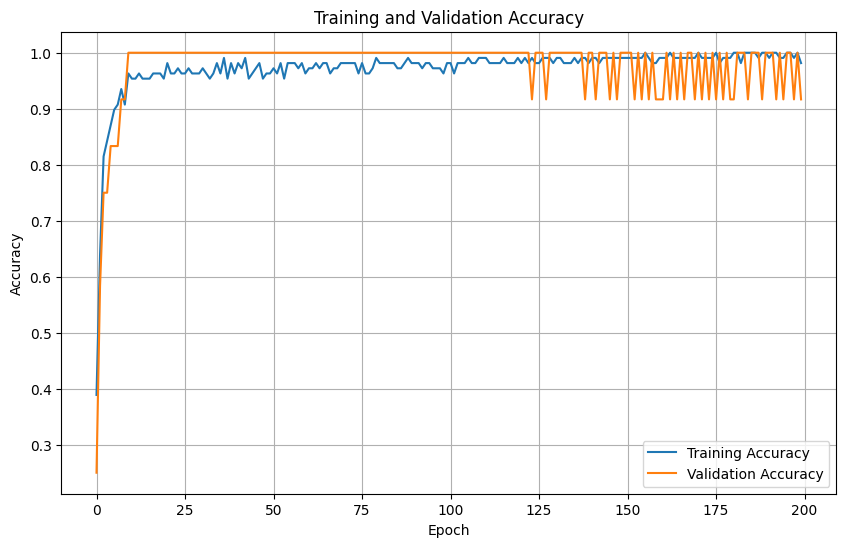

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


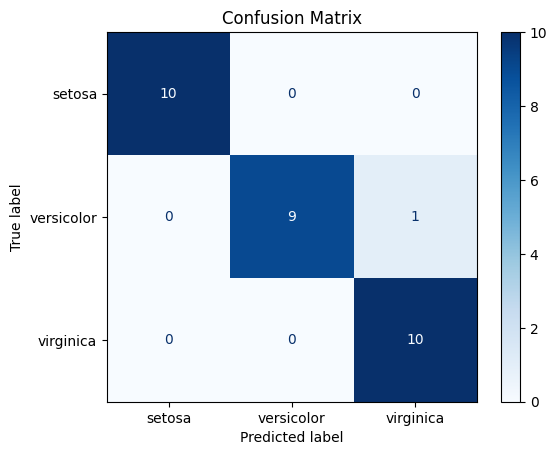

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras.optimizers import SGD

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Scale the data (IMPORTANT)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=120, random_state=42, stratify=y)

# Create the model
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

model = keras.models.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compile with sparse categorical crossentropy
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.1, batch_size=8)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.2f}")

# Plot training & validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Predict on test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

